# 图像特效-xdog-滤镜

In [1]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram
from skimage.color import rgb2gray
from scipy.ndimage.filters import gaussian_filter
from skimage.filters import threshold_otsu

In [2]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [3]:
def xdog(im, gamma=0.98, phi=200, eps=-0.1, k=1.6, sigma=0.8, binarize=False):
    # Source : https://github.com/CemalUnal/XDoG-Filter
    # Reference : XDoG: An eXtended difference-of-Gaussians compendium including advanced image stylization
    # Link : http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.365.151&rep=rep1&type=pdf
    if im.shape[2] == 3:
        im = rgb2gray(im)
    imf1 = gaussian_filter(im, sigma)
    imf2 = gaussian_filter(im, sigma * k)
    imdiff = imf1 - gamma * imf2
    imdiff = (imdiff < eps) * 1.0  + (imdiff >= eps) * (1.0 + np.tanh(phi * imdiff))
    imdiff -= imdiff.min()
    imdiff /= imdiff.max()
    if binarize:
        th = threshold_otsu(imdiff)
        imdiff = imdiff >= th
    imdiff = imdiff.astype('float32')
    imdiff[imdiff < 0] = 0
    imdiff[imdiff > 255] = 255
    return imdiff.astype(np.uint8)

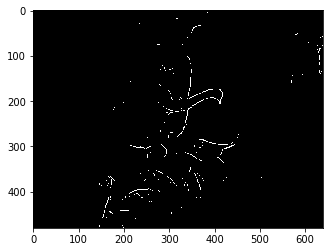

In [5]:
dst = xdog(rgb)
plt.imshow(dst,'gray')